In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import pickle
import os.path
from datetime import datetime
import pyarrow
import matplotlib.pyplot as plt
%matplotlib inline

#set ggplot style
plt.style.use('ggplot')

In [2]:
#Constant parameters
FILE = 'data/updated_2020-01-30.parquet.gzip'
df = pd.read_parquet(FILE)

In [3]:
# Convert types
for col in ['confirmed', 'deaths', 'recovered']:
    df[col] = df[col].replace('', 0).astype(int)


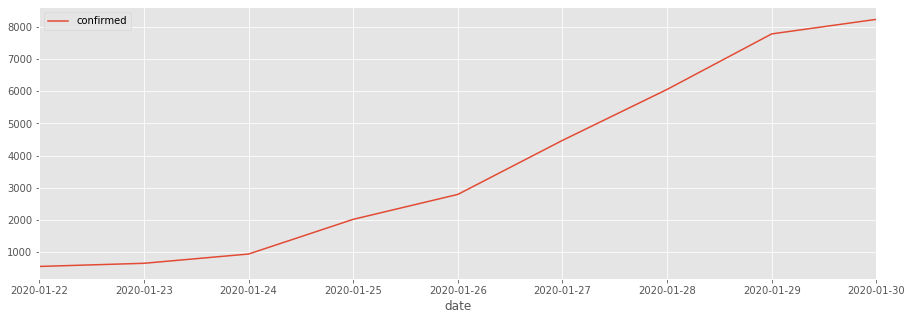

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
df.groupby(['date'])[['confirmed']].sum().plot(ax=ax)

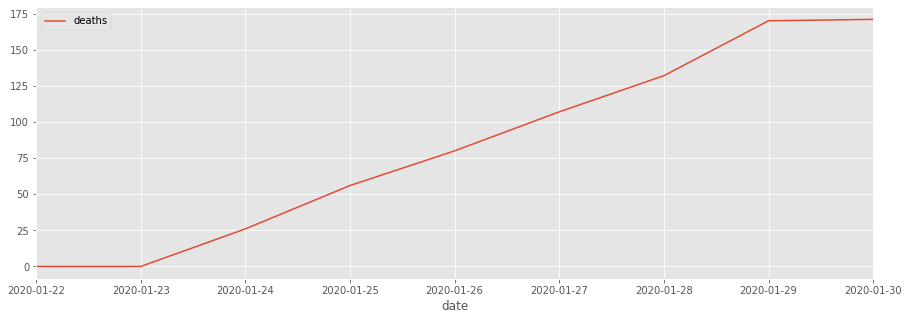

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
df.groupby(['date'])[['deaths']].sum().plot(ax=ax)

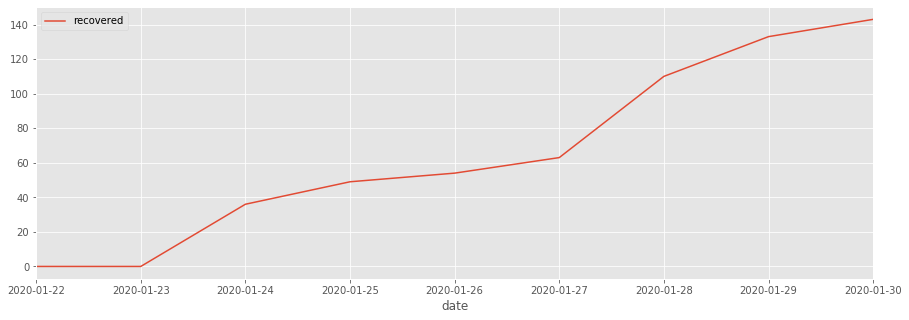

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
df.groupby(['date'])[['recovered']].sum().plot(ax=ax)

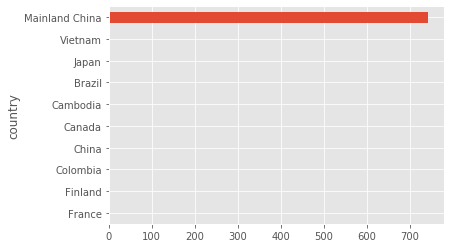

In [7]:
x = df.groupby('country')['deaths'].sum().sort_values().tail(10)
x.plot(kind='barh')

### Get the number of new confirmed cases for each day

In [8]:
'''
Get the difference of the sum totals for each
date and plot them on a trendline graph
'''
def get_new_cases(df):
    diff_list = []
    tmp_df_list = []
    for i, day in enumerate(df.date.unique()):    
        tmp_df = df[df.date == day]
        tmp_df_list.append(tmp_df['confirmed'].sum())
        
        if i == 0:
            diff_list.append(tmp_df['confirmed'].sum())
        else:
            diff_list.append(tmp_df['confirmed'].sum() - tmp_df_list[i-1])
        
    return diff_list

In [9]:
new_df = pd.DataFrame([])
new_df['new_confirmed_cases'] = get_new_cases(df)
new_df['date'] = df.date.unique()

In [10]:
# ? fig

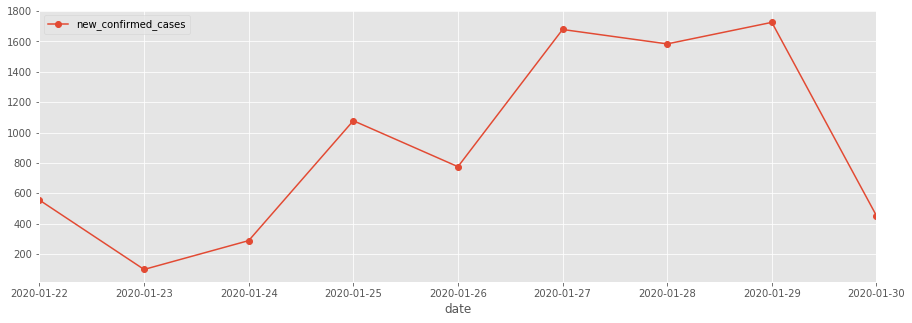

In [11]:
fig, ax = plt.subplots(figsize=(15,5))

new_df.groupby(['date'])[['new_confirmed_cases']].sum().plot(ax=ax, marker='o')

In [103]:
from datetime import datetime
file_name = './data/new_cases_updated_{}.parquet.gzip'.format(datetime.date(datetime.now()))
csv_file_name = './data/new_cases_updated_{}.csv'.format(datetime.date(datetime.now()))

new_df.astype(str).to_csv(csv_file_name)
new_df.astype(str).to_parquet(file_name, compression='gzip')

In [15]:
str(datetime.date(datetime.now()))

'2020-01-30'

In [20]:
if not os.path.exists('./data/hehe'):
    print('yeah')

yeah
